In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### I. Designing a query to retrieve the last 12 months of precipitation data and plot the results

#### 1. Calculate the date 1 year ago from the last data point in the database

In [10]:
# To work with dates
import datetime as dt

# latest date
latest_date_a = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date_a


('2017-08-23')

In [11]:
# date from 1 year ago
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

#### 2. Perform a query to retrieve the data and precipitation scores

In [12]:
# Extra.To inspect columns names and types of table 'Measurement'
inspector = inspect(engine)

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
past_12_months_precipitation = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

past_12_months_precipitation

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

#### 3. Save the query results as a Pandas DataFrame and set the index to the date column and sort the dataframe by date

In [14]:
df = pd.DataFrame(past_12_months_precipitation, columns=['Date', 'Precipitation'])
df.set_index('Date').head()

df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


#### 4. Use Pandas Plotting with Matplotlib to plot the data

Text(0.5, 1.0, 'Precipitacion of Past 12 Months')

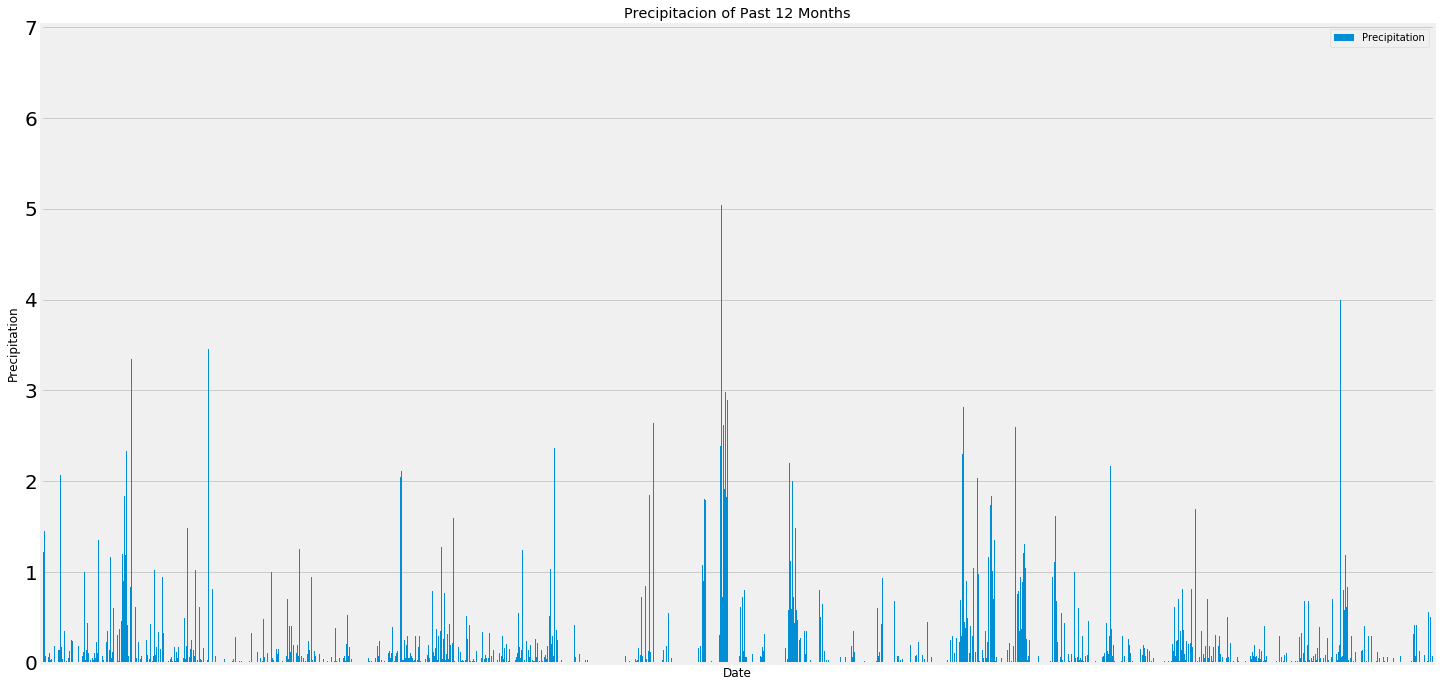

In [15]:
# Pandas Plotting with Matplotlib to plot the data

df_plot = df.plot(kind="bar",width=1.0,fontsize=20,figsize=(20,10),joinstyle='round')

#figsize=(10,5)
plt.tight_layout()

y_pos = []
plt.xticks(y_pos)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitacion of Past 12 Months")



#### 5. Use Pandas to calcualte the summary statistics for the precipitation data

In [16]:
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

#### I. Design a query to show how many stations are available in this dataset?

In [17]:
session.query(Measurement.station).distinct().count()

9

#### II. Most active stations? (i.e. what stations have the most rows)


In [18]:
# Stations list and observation counts in descending order
stations = session.query(Measurement.station,func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Station with more observations (i.e.Most active station)
active_station_id = stations[0][0]
active_station_id

'USC00519281'

In [20]:
# Extra.To inspect columns names and types of table 'Measurement'
inspector = inspect(engine)

columns = inspector.get_columns('Measurement')

for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# Most active station Id, minimum, maximum and average temp 
session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
            filter(Measurement.station == active_station_id).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

#### III. Retrieve the last 12 months of temperature observation data (tobs)


In [22]:
# Filter by the station with the highest number of observations.
active_station_id

'USC00519281'

In [23]:
# Plot the results as a histogram with `bins=12`

active_station_date = session.query(Measurement.date).\
                     filter(Measurement.station == active_station_id).\
                    order_by(Measurement.date.desc()).first()
active_station_latest_date = active_station_date[0]
active_station_latest_date

active_station_year_ago = dt.date(2017, 8, 18) - dt.timedelta(days=365)
active_station_year_ago 

past_12_months_temperature = session.query(Measurement.date,Measurement.tobs).\
                filter(Measurement.date > active_station_year_ago ).\
                filter(Measurement.station == active_station_id).\
                order_by(Measurement.date).all()
past_12_months_temperature

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x_axis = [date[0] for date in past_12_months_temperature]
y_axis = [temp[1] for temp in past_12_months_temperature]


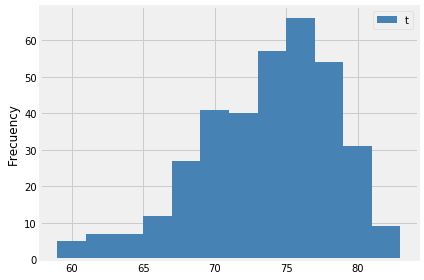

In [25]:
# Histogram 
plt.hist(y_axis, facecolor="steelblue",bins=12)
plt.legend("tobs", loc="upper right",prop={'size': 10})
plt.ylabel("Frecuency")
plt.tight_layout()



### Temperature Analysis

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


#### I. * Using `calc_temps` function, obtian the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


from datetime import datetime
start_date = '2012-02-28'
finish_date = '2012-03-05'

i_date_format = datetime.strptime(f'{start_date}T01:02:03', '%Y-%m-%dT%H:%M:%S').date()
f_date_format = datetime.strptime(f'{finish_date}T01:02:03', '%Y-%m-%dT%H:%M:%S').date()

year_ago_initial_date = i_date_format - dt.timedelta(days=365)
print(year_ago_initial_date) 

year_ago_finish_date = f_date_format - dt.timedelta(days=366)
print(year_ago_finish_date) 

2011-02-28
2011-03-05


In [28]:
temp = calc_temps(year_ago_initial_date,year_ago_finish_date )
temp 

[(61.0, 69.75510204081633, 75.0)]

In [29]:
calc = list(np.ravel(temp))
calc

[61.0, 69.75510204081633, 75.0]

In [30]:
tmin = [temp[0][0] for t in temp]
tmax = [temp[0][2] for t in temp]
tave = [temp[0][1] for t in temp]